# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal? 

> Yes, the histogram below shows a normal distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC21A65198>]], dtype=object)

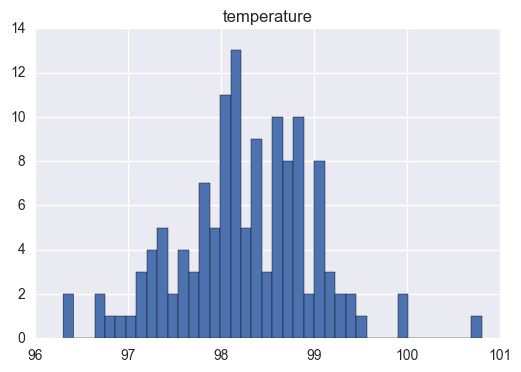

In [4]:
df.hist(column='temperature', bins=40)

## 2. Is the sample size large? Are the observations independent? 

> The sample size is greater than 30, so in this case the sample size is considered large.

> The observations are independent.

In [5]:
df.mean()

temperature    98.249231
heart_rate     73.761538
dtype: float64

## 3. Is the true population mean really 98.6 degrees F?

### Would you use a one-sample or two-sample test? Why?
> One sample because there was only 1 sample group. 

### In this situation, is it appropriate to use the t or z statistic?
> The t-test should be used because the population standard deviation is not known. I will calculate a z-score as well, to compare the 2.

### 1 sample t-test
Null hypothesis: population mean temperature = 98.6 degrees F

Alternative hypothesis: population mean temperature is != 98.6 degrees F

In [31]:
from scipy import stats
one_sample = stats.ttest_1samp(df['temperature'], 98.6)
print("The t-stat is %.3f and p-value is %.3f." % one_sample)

The t-stat is -5.455 and p-value is 0.000.


### 1 sample z-test
Null hypothesis: population mean temperature = 98.6 degrees F

Alternative hypothesis: population mean temperature is != 98.6 degrees F

In [17]:
pop_mean = 98.6

z_score = (pop_mean / df['temperature'].mean()) / df['temperature'].std()
p_score = (1 - 0.9147) * 2
print("The z-stat is %.3f and p-value is %.3f" % (z_score, p_score))    

The z-stat is 1.369 and p-value is 0.171


### How is the result be different? Why? 

> The low t-score and p-value mean it is very unlikely that the sample mean and the assumed population mean come from the same extrapolated population.

> The z-score is a measure of how many standard deviations away from the sample mean the assumed population mean is (z-score = 1.369). 

### 4. Margin of Error and Confidence Intervals

In [23]:
# margin of error calculations
degrees_of_freedom = 129
alpha = 1.980
me_partial = df['temperature'].std() / np.sqrt(130)
margin_error = me_partial * alpha
margin_error

0.12732274533902418

In [24]:
# confidence interval calculations
lower_range = df['temperature'].mean() - margin_error
upper_range = df['temperature'].mean() + margin_error
print("The confidence interval is %.3f to %.3f" % (lower_range, upper_range))

The confidence interval is 98.122 to 98.377


### At what temperature should we consider someone's temperature to be "abnormal"? 
> At a 95% confidence interval above 98.34 F would be considered abnormal. The accepted population mean of 98.6 F falls outside that range, so according to the sample data that would be considered abnormal.

### 5. Is there a significant difference between males and females in normal temperature? 

Null hypothesis: male mean temperature = female mean temperature

Alternative hypothesis: male mean temperature != female mean temperature

In [39]:
m_df = df.loc[df['gender'] =='M']
f_df = df.loc[df['gender'] =='F']
print("male mean temp: %.3f" % m_df['temperature'].mean())
print("female mean temp: %.3f" % f_df['temperature'].mean())

male mean temp: 98.105
female mean temp: 98.394


In [36]:
t, p = stats.ttest_ind(m_df['temperature'], f_df['temperature'], equal_var=False)
print("t-score is: %.3f" % t)
print("p-value is: %.3f" % p)

t-score is: -2.285
p-value is: 0.024


> The p-value is the probability of seeing the observed effect given that the null hypothesis is true. Since the calculated p-value for the data is low (approx. 2.4%) we can reject the null in this case. 

### Conclusion

Based on this sample data, the accepted population mean temperature of 98.6 degrees F seems very unlikely to be accurate. Given that Carl Wunderlich took his readings in 1868 using the tools available at the time (ie. probably not very accurate), I think it is kind of amazing that his estimation of the population mean temperature is so close to what was measured in modern times. 

Additionally, there was a measured, statistically significant difference between mean temperatures of Men and Women in the sample data. This was something that surprised me, and would warrant further investigation in my opinion to find out why that is the case.